![pythonLogo.png](https://www.python.org/static/community_logos/python-powered-w-200x80.png)

# 08 Heaps #


## Recap on Stacks and Queues

## Stacks are LIFO

![stack.png](https://scaler.com/topics/images/working-of-stack-in-java.gif)

## Queues are FIFO 
![queue.png](https://miro.medium.com/max/1196/1*PMYRFmVecFT61P4aAh0g1g.png)

A heap is a specialized tree-based data structure that satisfies the heap property:

* Max-Heap: In a max-heap, for any given node C, if P is a parent node of C, then the key (value) of P is greater than or equal to the key of C.

* Min-Heap: In a min-heap, the key of P is less than or equal to the key of C.

* Complete Binary Tree: Heaps are complete binary trees, meaning all levels are fully filled except possibly the last, which is filled from left to right.

* Heap Property: Ensures that the highest (max-heap) or lowest (min-heap) key is always at the root.

* Priority Queue: Tasks with higher priority are processed first.

* Scheduling: Managing jobs based on their urgency or importance.

![min_max_heaps](https://miro.medium.com/v2/resize:fit:1316/format:webp/1*02r6G-ho8DPnfiaOIHA2OA.png)

![heapify](https://miro.medium.com/v2/resize:fit:1266/format:webp/1*IJDDOZOsFGLpf445qo1XKw.png)

## Python's `heapq` library

In [10]:
import heapq

In [11]:
dir(heapq)

['__about__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_heapify_max',
 '_heappop_max',
 '_heapreplace_max',
 '_siftdown',
 '_siftdown_max',
 '_siftup',
 '_siftup_max',
 'heapify',
 'heappop',
 'heappush',
 'heappushpop',
 'heapreplace',
 'merge',
 'nlargest',
 'nsmallest']

## `heapify`

In [18]:
# Sample list
data = [9, 5, 6, 2, 3]

# Heapify the list
heapq.heapify(data)
print("Heapified list:", data)  # Output: [2, 3, 6, 5, 9]


Heapified list: [2, 3, 6, 5, 9]


## `heappush` and `heappop`

In [20]:
# Push a new element
heapq.heappush(data, 1)
print("After pushing 1:", data)  # Output: [1, 2, 6, 5, 9, 3]

# Pop the smallest element
smallest = heapq.heappop(data)
print("Popped smallest element:", smallest)  # Output: 1
print("Heap after pop:", data)  # Output: [2, 3, 6, 5, 9]

After pushing 1: [1, 3, 2, 5, 9, 6]
Popped smallest element: 1
Heap after pop: [2, 3, 6, 5, 9]


## max-heap

In [ ]:
import heapq

# Sample list
data = [9, 5, 6, 2, 3]

# Convert to max-heap by inverting the values
max_heap = [-x for x in data]
heapq.heapify(max_heap)
print("Max-Heap (inverted):", max_heap)  # Output: [-9, -5, -6, -2, -3]

# Push a new element (inverted)
heapq.heappush(max_heap, -10)
print("After pushing -10:", max_heap)  # Output: [-10, -5, -9, -2, -3, -6]

# Pop the largest element
largest = -heapq.heappop(max_heap)
print("Popped largest element:", largest)  # Output: 10
print("Max-Heap after pop:", max_heap)  # Output: [-9, -5, -6, -2, -3]

## Creating a class for MaxHeap

In [2]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def insert(self, key):
        self.heap.append(key)
        self._heapify_up(len(self.heap) - 1)

    def extract_max(self):
        if not self.heap:
            return None
        max_val = self.heap[0]
        # Move the last element to the root
        self.heap[0] = self.heap.pop()
        self._heapify_down(0)
        return max_val

    def _heapify_up(self, index):
        parent = (index - 1) // 2
        if index > 0 and self.heap[parent] < self.heap[index]:
            # Swap
            self.heap[parent], self.heap[index] = self.heap[index], self.heap[parent]
            self._heapify_up(parent)

    def _heapify_down(self, index):
        largest = index
        left = 2 * index + 1
        right = 2 * index + 2

        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left

        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        if largest != index:
            # Swap
            self.heap[largest], self.heap[index] = self.heap[index], self.heap[largest]
            self._heapify_down(largest)

    def peek_max(self):
        return self.heap[0] if self.heap else None

    def __str__(self):
        return str(self.heap)

In [3]:
# Example Usage
if __name__ == "__main__":
    mh = MaxHeap()
    elements = [3, 1, 6, 5, 2, 4]
    for elem in elements:
        mh.insert(elem)
        print(f"Inserted {elem}: Heap = {mh}")

    print(f"Max element: {mh.extract_max()}")
    print(f"Heap after extraction: {mh}")

Inserted 3: Heap = [3]
Inserted 1: Heap = [3, 1]
Inserted 6: Heap = [6, 1, 3]
Inserted 5: Heap = [6, 5, 3, 1]
Inserted 2: Heap = [6, 5, 3, 1, 2]
Inserted 4: Heap = [6, 5, 4, 1, 2, 3]
Max element: 6
Heap after extraction: [5, 3, 4, 1, 2]


## Heap Sort

In [5]:
import heapq

def heap_sort(iterable):
    h = []
    for value in iterable:
        heapq.heappush(h, value)
    sorted_list = []
    while h:
        sorted_list.append(heapq.heappop(h))
    return sorted_list

data = [3, 1, 4, 1, 5, 9, 2, 6, 5]
sorted_data = heap_sort(data)
print("Sorted Data:", sorted_data)

Sorted Data: [1, 1, 2, 3, 4, 5, 5, 6, 9]


## Finding the K largest or smallest elements

In [6]:
import heapq

data = [3, 1, 4, 1, 5, 9, 2, 6, 5]
top_3 = heapq.nlargest(3, data)
print("Top 3 Largest Elements:", top_3)

Top 3 Largest Elements: [9, 6, 5]


In [9]:
import heapq

data = [3, 1, 4, 1, 5, 9, 2, 6, 5]
top_3 = heapq.nsmallest(3, data)
print("Top 3 Smallest:", top_3)

Top 3 Smallest: [1, 1, 2]


## Exercise: Apply Heap Sort to large data sets

Extension: What is the time complexity for heap sort? How does this compare to the time complexity of other sorting algorithms?

## Exercise: Implement a Priority Queue using a Heap

## Scenario Exercise: Task Scheduler


In [13]:
import heapq

tasks = []
# (priority, task_name)
heapq.heappush(tasks, (4, 'Clean the house'))
heapq.heappush(tasks, (1, 'Pay bills'))
heapq.heappush(tasks, (3, 'Read a book'))
heapq.heappush(tasks, (2, "Submit assignment"))

while tasks:
    priority, task = heapq.heappop(tasks)
    print(f"Processing task: {task} with priority {priority}")

Processing task: Pay bills with priority 1
Processing task: Submit assignment with priority 2
Processing task: Read a book with priority 3
Processing task: Clean the house with priority 4


## Visualising a heap via `networkx`


`pip install networkx matplotlib`  
  `python3 -m pip install -U networkx matplotlib --user`

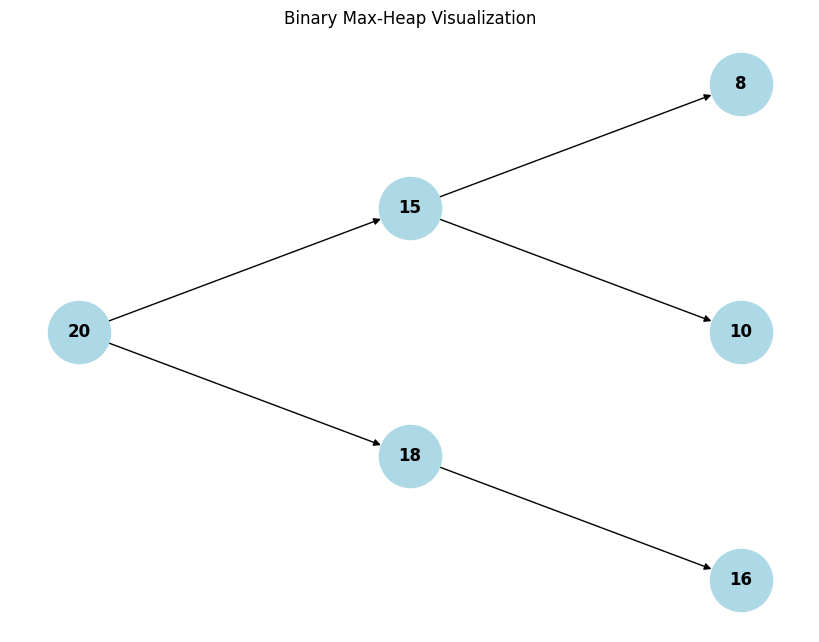

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def build_binary_heap_graph(heap):
    """
    Constructs a binary heap graph from a list of heap elements.
    
    Parameters:
    - heap (list): The list representing the heap.
    
    Returns:
    - G (networkx.DiGraph): The constructed directed graph representing the heap.
    """
    G = nx.DiGraph()
    n = len(heap)
    for i in range(n):
        G.add_node(i, label=heap[i])
        left = 2 * i + 1
        right = 2 * i + 2
        if left < n:
            G.add_edge(i, left)
        if right < n:
            G.add_edge(i, right)
    return G

def assign_levels(heap):
    """
    Assigns a level to each node in the heap based on its index.
    
    Parameters:
    - heap (list): The list representing the heap.
    
    Returns:
    - levels (dict): A dictionary mapping node indices to their levels.
    """
    levels = {}
    for i in range(len(heap)):
        levels[i] = math.floor(math.log2(i + 1))
    return levels

def visualize_heap(G, levels, heap, title="Binary Heap Visualization"):
    """
    Visualizes the binary heap using NetworkX and Matplotlib.
    
    Parameters:
    - G (networkx.DiGraph): The heap graph.
    - levels (dict): Node index to level mapping.
    - heap (list): The list representing the heap.
    - title (str): The title of the plot.
    """
    # Assign 'subset' attribute to each node based on its level
    for node in G.nodes():
        G.nodes[node]['subset'] = levels[node]
    
    # Use multipartite_layout with the 'subset' attribute
    pos = nx.multipartite_layout(G, subset_key='subset')
    labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(8,6))
    nx.draw(
        G, pos, 
        with_labels=True, 
        labels=labels, 
        node_size=2000, 
        node_color='lightblue', 
        font_size=12, 
        font_weight='bold'
    )
    plt.title(title)
    plt.show()

# Example binary heap (max-heap)
heap = [20, 15, 18, 8, 10, 16]

# Build the graph
G = build_binary_heap_graph(heap)

# Assign levels to each node
levels = assign_levels(heap)

# Visualize the heap
visualize_heap(G, levels, heap, title="Binary Max-Heap Visualization")

# Min-Heap and Max-Heap

# Heap Sort

# heapq function

# Enqueue - Add items to a queue

In [2]:

class Node:
  def __init__(self, value, next_node=None):
    self.value = value
    self.next_node = next_node
    
  def get_value(self):
    return self.value
  
  def get_next_node(self):
    return self.next_node
  
  def set_next_node(self, next_node):
    self.next_node = next_node
    

class Queue:
  def __init__(self, max_size=None):
    self.head = None
    self.tail = None
    self.max_size = max_size
    self.size = 0
    
  # Add your enqueue method below:
  def enqueue(self, value):
    if self.has_space():
      item_to_add = Node(value)
      print("Adding " + str(item_to_add.get_value()) + " to the queue!")
      if self.is_empty():
        self.head = item_to_add
        self.tail = item_to_add
      else:
        self.tail.set_next_node(item_to_add)
        self.tail = item_to_add
      self.size += 1
    else:
      print("Sorry, no more room!")
    
  def peek(self):
    if self.is_empty():
      print("Nothing to see here!")
    else:
      return self.head.get_value()
  
  def get_size(self):
    return self.size
  
  def has_space(self):
    if self.max_size == None:
      return True
    else:
      return self.max_size > self.get_size()
    
  def is_empty(self):
    return self.size == 0

q = Queue()
q.enqueue("all the fluffy kitties")

Adding all the fluffy kitties to the queue!


# Dequeue - removal from the Queue

In [3]:
class Node:
  def __init__(self, value, next_node=None):
    self.value = value
    self.next_node = next_node
    
  def get_value(self):
    return self.value
  
  def get_next_node(self):
    return self.next_node
  
  def set_next_node(self, next_node):
    self.next_node = next_node

class Queue:
  def __init__(self, max_size=None):
    self.head = None
    self.tail = None
    self.max_size = max_size
    self.size = 0
    
  def enqueue(self, value):
    if self.has_space():
      item_to_add = Node(value)
      print("Adding " + str(item_to_add.get_value()) + " to the queue!")
      if self.is_empty():
        self.head = item_to_add
        self.tail = item_to_add
      else:
        self.tail.set_next_node(item_to_add)
        self.tail = item_to_add
      self.size += 1
    else:
      print("Sorry, no more room!")
      
  # Add your dequeue method below:    
  def dequeue(self):
    if self.get_size() > 0:
      item_to_remove = self.head
      print("Removing " + str(item_to_remove.get_value()) + " from the queue!")
      if self.get_size() == 1:
        self.head = None
        self.tail = None
      else:
        self.head = self.head.get_next_node()
      self.size -= 1
      return item_to_remove.get_value()
    else:
      print("This queue is totally empty!")
  
  def peek(self):
    if self.is_empty():
      print("Nothing to see here!")
    else:
      return self.head.get_value()
  
  def get_size(self):
    return self.size
  
  def has_space(self):
    if self.max_size == None:
      return True
    else:
      return self.max_size > self.get_size()
    
  def is_empty(self):
    return self.size == 0

q = Queue()
q.enqueue("some guy with a mustache")
q.dequeue()


Adding some guy with a mustache to the queue!
Removing some guy with a mustache from the queue!


'some guy with a mustache'

# Queue example

In [2]:
class Node:
  def __init__(self, value, next_node=None):
    self.value = value
    self.next_node = next_node
    
  def get_value(self):
    return self.value
  
  def get_next_node(self):
    return self.next_node
  
  def set_next_node(self, next_node):
    self.next_node = next_node

class Queue:
  def __init__(self, max_size=None):
    self.head = None
    self.tail = None
    self.max_size = max_size
    self.size = 0
    
  def enqueue(self, value):
    if self.has_space():
      item_to_add = Node(value)
      print("Adding " + str(item_to_add.get_value()) + " to the queue!")
      if self.is_empty():
        self.head = item_to_add
        self.tail = item_to_add
      else:
        self.tail.set_next_node(item_to_add)
        self.tail = item_to_add
      self.size += 1
    else:
      print("Sorry, no more room!")
         
  def dequeue(self):
    if self.get_size() > 0:
      item_to_remove = self.head
      print(str(item_to_remove.get_value()) + " is served!")
      if self.get_size() == 1:
        self.head = None
        self.tail = None
      else:
        self.head = self.head.get_next_node()
      self.size -= 1
      return item_to_remove.get_value()
    else:
      print("The queue is totally empty!")
  
  def peek(self):
    if self.is_empty():
      print("Nothing to see here!")
    else:
      return self.head.get_value()
  
  def get_size(self):
    return self.size
  
  def has_space(self):
    if self.max_size == None:
      return True
    else:
      return self.max_size > self.get_size()
    
  def is_empty(self):
    return self.size == 0

print("Creating a deli line with up to 10 orders...\n------------")
deli_line = Queue(10)
print("Adding orders to our deli line...\n------------")
deli_line.enqueue("egg and cheese on a roll")
deli_line.enqueue("bacon, egg, and cheese on a roll")
deli_line.enqueue("toasted sesame bagel with butter and jelly")
deli_line.enqueue("toasted roll with butter")
deli_line.enqueue("bacon, egg, and cheese on a plain bagel")
deli_line.enqueue("two fried eggs with home fries and ketchup")
deli_line.enqueue("egg and cheese on a roll with jalapeos")
deli_line.enqueue("plain bagel with plain cream cheese")
deli_line.enqueue("blueberry muffin toasted with butter")
deli_line.enqueue("bacon, egg, and cheese on a roll")
# ------------------------ #
# Uncomment the line below:
deli_line.enqueue("western omelet with home fries")
# ------------------------ #
print("------------\nOur first order will be " + deli_line.peek())
print("------------\nNow serving...\n------------")
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
deli_line.dequeue()
# ------------------------ #
# Uncomment the line below:
deli_line.dequeue()
# ------------------------ #

Creating a deli line with up to 10 orders...
------------
Adding orders to our deli line...
------------
Adding egg and cheese on a roll to the queue!
Adding bacon, egg, and cheese on a roll to the queue!
Adding toasted sesame bagel with butter and jelly to the queue!
Adding toasted roll with butter to the queue!
Adding bacon, egg, and cheese on a plain bagel to the queue!
Adding two fried eggs with home fries and ketchup to the queue!
Adding egg and cheese on a roll with jalapeos to the queue!
Adding plain bagel with plain cream cheese to the queue!
Adding blueberry muffin toasted with butter to the queue!
Adding bacon, egg, and cheese on a roll to the queue!
Sorry, no more room!
------------
Our first order will be egg and cheese on a roll
------------
Now serving...
------------
egg and cheese on a roll is served!
bacon, egg, and cheese on a roll is served!
toasted sesame bagel with butter and jelly is served!
toasted roll with butter is served!
bacon, egg, and cheese on a plain bag

## Exercise

Insert a 'code' cell below. In this do the following:

- 1 - Instantiate the Queue class - check that you can successfully insert (enqueue), and remove (dequeue) items. Also check the order of the removal (dequeue). Is the First In First Out principle implemented correctly.
- 2 - Now do the same for the Queue - create a LinkedQueue class that will be a queue of separate linkedlist objects. Each object is a linkedlist, and can enqueued and dequeued as any other object would.

C++ EXERCISES to ADAPT

/*
* Exercise 3: Create a Queue that uses an Array 
* Using an integer array, complete the class outline below to be able to 'enqueue' and 'dequeue' integer values. 
* The enqueue function should add data to the 'rear' of the queue. 
* The dequeue function should remove data to the 'front' of the queue.
*  
* Extension 1: Add front and rear 'pointers' so fixed size arrays can be treated as 'circular queue'.
* Extension 2: Add code to the 'enqueue' function so items are sorted via 'priority'.   
*/

/*
* Exercise 4: Linked Queue 
* Now amend your Queue class and its logic to work a linked list of nodes/links (pointers to objects of any class)
* You may want to make this a template class so it can handle pointers to objects of any class structure. 
* 
* Extension: If you completed the 'Contacts' class from 04 Hashing, you could model/simulate a 'queue' of customers. 
*            (Think trying to phone an energy company!)  
*            Generate some customer nodes and add them to a queue (enqueue them).
*            You could 'dequeue' customers after they have been served (you could simulate this by generating random lengths of conversation).
*            Track a given caller's position in the queue (and this should update regularly as customers ahead in the queue are served and exit the queue).
*/



## Exercise 1: Queue using a Python list [ ]

In [ ]:
# Write your solution here. 

## Exercise 2: Queue using a Numpy Array

In [ ]:
# Write your solution here.

## Exercise 3: Queue using a Linked List (Linked Queue)

In [ ]:
# Write your solution here.

## Exercise 4: Priority Queue

In [ ]:
# Write your solution here.

## Exercise 5: Circular Queue for fixed sized data structures (Numpy Array)

In [ ]:
# Write your solution here. 

# Scenario exercise - Model a Queue of people 
Queues are everywhere in our social world - humans need to queue to enter venues or get access to services! 

Start by modelling a call centre which handles incoming calls. Usually callers are put into a queue and told which position they are in. 

Start by creating a simple queue system where objects of a class (e.g. Person, or Contact) are added to the queue. 

Use random number generators to simulate the time it takes to be served,  

Extension: in the case of larger capacity venues such as football matches or airport security, these require people to be filtered into multiple separate queues to ensure the crowd keep moving. So model a larger capacity data set (you can generate at random), and decide how many queues would be optimal to keep people moving, perhaps up to a fixed capacity. 

Remember that large capacity venues also halt queues periodically to give the people ahead the chance to be served. 

Extension: If you completed the 'Contacts' class from 04 Hashing, you could model/simulate a 'queue' of customers. 
* Think trying to phone an energy company!  
* Generate some customer nodes and add them to a queue (enqueue them).
* You could 'dequeue' customers after they have been served (you could simulate this by generating random lengths of conversation).
* Track a given caller's position in the queue (and this should update regularly as customers ahead in the queue are served and exit the queue).

In [ ]:
# Write your solution here.